### Retail costumer analysis 
* consuming behavior 
* costumer segmentation
* identifying patterns

In [62]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:20.3f}'.format

pd.set_option('display.max_columns',999)

In [8]:
df = pd.read_excel('online_retail_II.xlsx',sheet_name=0)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [19]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [15]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [20]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [24]:
df.loc[df['Quantity'] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [27]:
df['Invoice'] = df['Invoice'].astype('str')
df[df['Invoice'].str.match('^\\d{6}$') ==  False] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [29]:
df['Invoice'].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [33]:
df[df['Invoice'].str.startswith('A')].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [32]:
df[df['Invoice'].str.startswith('A')].shape

(3, 8)

In [43]:
df['StockCode']= df['StockCode'].astype('str')
df[(df['StockCode'].str.match('^d\\{5}$') == False) & (df['StockCode'].str.match('^d\\{5}[a-zA-z]+') == False)]["StockCode"].unique()

array(['85048', '79323P', '79323W', ..., '22935', '22933', '21120'],
      dtype=object)

In [42]:
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

In [44]:
cleaned_df = df.copy()

In [45]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')

In [46]:
mask = (
    cleaned_df['Invoice'].str.match('^\\d{6}$') == True
)
cleaned_df = cleaned_df[mask]

In [47]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [48]:
cleaned_df.drop('StockCode',axis=1,inplace=True)

In [49]:
cleaned_df.dropna(subset='Customer ID',inplace=True)

In [52]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407695.00,407695,407695.00,407695.00
mean,13.59,2010-07-01 10:10:10.782177792,3.29,15368.50
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,13997.00
50%,5.00,2010-07-09 15:46:00,1.95,15321.00
75%,12.00,2010-10-14 17:09:00,3.75,16812.00
max,19152.00,2010-12-09 20:01:00,10953.50,18287.00
std,96.84,NaN,34.76,1679.80


In [65]:
len(cleaned_df[cleaned_df['Price'] == 0])
cleaned_df = cleaned_df[cleaned_df['Price'] > 0.001]

In [67]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407650.000,407650,407650.000,407650.000
mean,13.586,2010-07-01 10:18:51.269422336,3.295,15368.620
min,1.000,2009-12-01 07:45:00,0.030,12346.000
25%,2.000,2010-03-26 14:01:00,1.250,13997.000
50%,5.000,2010-07-09 15:48:00,1.950,15321.000
75%,12.000,2010-10-14 17:09:00,3.750,16812.000
max,19152.000,2010-12-09 20:01:00,10953.500,18287.000
std,96.842,NaN,34.759,1679.767


In [70]:
len(cleaned_df) / len(df) *100

77.5794968608517

during the cleaning process with lost 23% of our data 

### Feature Engineering

In [73]:
cleaned_df['Sales'] = cleaned_df['Quantity'] * cleaned_df['Price']

In [75]:
cleaned_df.columns

Index(['Invoice', 'Description', 'Quantity', 'InvoiceDate', 'Price',
       'Customer ID', 'Country', 'Sales'],
      dtype='object')

In [76]:
agg_df = cleaned_df.groupby('Customer ID',as_index=False).agg(
Monetary = ("Sales","sum"),
Frequency = ("Invoice",'nunique'),
lst_invoice_date = ("InvoiceDate","max")
)

agg_df.head()

,Customer ID,Monetary,Frequency,lst_invoice_date
0,12346.000,372.860,11,2010-06-28 13:53:00
1,12347.000,1323.320,2,2010-12-07 14:57:00
2,12348.000,222.160,1,2010-09-27 14:59:00
3,12349.000,2671.140,3,2010-10-28 08:23:00
4,12351.000,300.930,1,2010-11-29 15:23:00


In [85]:
max_date = cleaned_df['InvoiceDate'].max()

agg_df['Recency'] = ( max_date - agg_df['lst_invoice_date'] ).dt.days

In [86]:
agg_df.head()

,Customer ID,Monetary,Frequency,lst_invoice_date,Recency
0,12346.000,372.860,11,2010-06-28 13:53:00,164
1,12347.000,1323.320,2,2010-12-07 14:57:00,2
2,12348.000,222.160,1,2010-09-27 14:59:00,73
3,12349.000,2671.140,3,2010-10-28 08:23:00,42
4,12351.000,300.930,1,2010-11-29 15:23:00,10


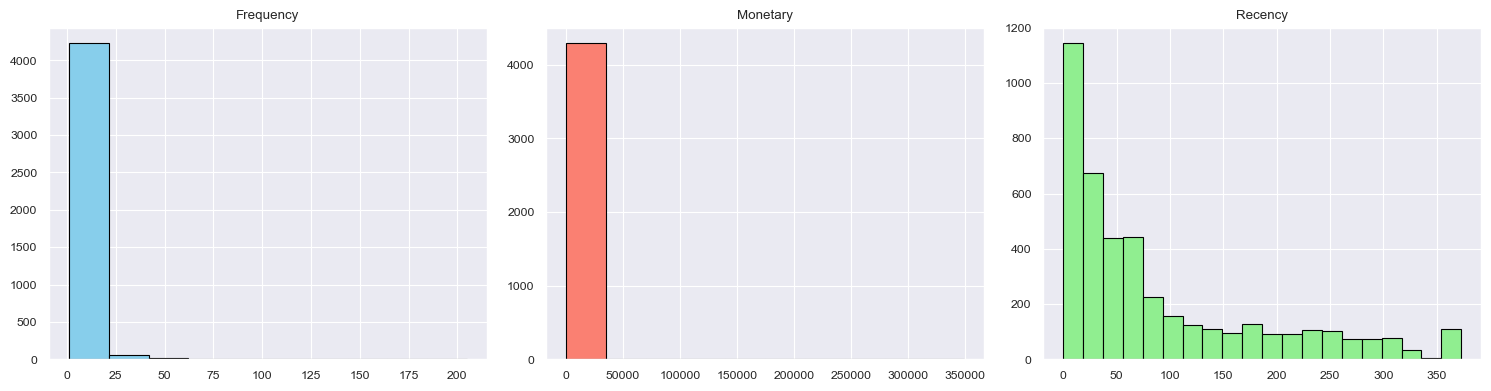

In [104]:
sns.set_theme('paper')
fig,axs = plt.subplots(1,3,figsize=(15,4))
axs[0].hist(agg_df['Frequency'],bins=10,color='skyblue',edgecolor='black')
axs[0].set_title('Frequency')

axs[1].hist(agg_df['Monetary'],bins=10,color='salmon',edgecolor='black')
axs[1].set_title('Monetary')

axs[2].hist(agg_df['Recency'],bins=20,color='lightgreen',edgecolor='black')
axs[2].set_title('Recency')
plt.tight_layout()



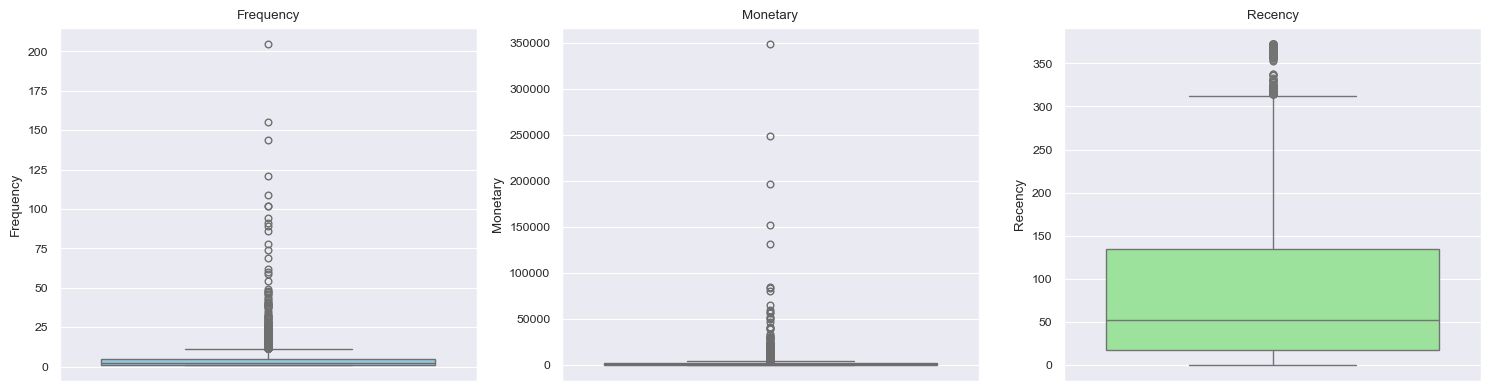

In [108]:
sns.set_theme('paper')
fig,axs = plt.subplots(1,3,figsize=(15,4))
sns.boxplot(y=agg_df['Frequency'],color='skyblue',ax=axs[0])
axs[0].set_title('Frequency')

sns.boxplot(agg_df['Monetary'],color='salmon',ax=axs[1])
axs[1].set_title('Monetary')

sns.boxplot(agg_df['Recency'],color='lightgreen',ax=axs[2])
axs[2].set_title('Recency')
plt.tight_layout()

In [129]:
M_Q1 = agg_df['Monetary'].quantile(0.25)
M_Q3 = agg_df['Monetary'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

montery_outlaiers_df = agg_df[(agg_df['Monetary'] > (M_Q3 + 1.5 * M_IQR)) | (agg_df['Monetary'] < (M_Q1 - 1.5 * M_IQR))].copy()

In [124]:
montery_outlaiers_df.describe()

,Customer ID,Monetary,Frequency,lst_invoice_date,Recency
count,4312.000,4312.000,4312.000,4312,4312.000
mean,15349.290,2048.238,4.456,2010-09-10 09:08:37.138219008,90.172
min,12346.000,2.950,1.000,2009-12-01 09:55:00,0.000
25%,13882.500,307.988,1.000,2010-07-27 09:53:00,17.000
50%,15350.500,706.020,2.000,2010-10-18 16:34:30,52.000
75%,16834.250,1723.142,5.000,2010-11-22 11:01:30,135.000
max,18287.000,349164.350,205.000,2010-12-09 20:01:00,373.000
std,1701.200,8914.481,8.170,NaN,96.861


In [130]:
M_Q1 = agg_df['Frequency'].quantile(0.25)
M_Q3 = agg_df['Frequency'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

Frequency_outliers_df = agg_df[(agg_df['Frequency'] > (M_Q3 + 1.5 * M_IQR)) | (agg_df['Frequency'] < (M_Q1 - 1.5 * M_IQR))].copy()

In [131]:
non_outliers = agg_df[(~agg_df.index.isin(montery_outlaiers_df.index)) & (~agg_df.index.isin(Frequency_outliers_df.index))]
non_outliers

,Customer ID,Monetary,Frequency,lst_invoice_date,Recency
0,12346.000,372.860,11,2010-06-28 13:53:00,164
1,12347.000,1323.320,2,2010-12-07 14:57:00,2
2,12348.000,222.160,1,2010-09-27 14:59:00,73
3,12349.000,2671.140,3,2010-10-28 08:23:00,42
4,12351.000,300.930,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4307,18283.000,641.770,6,2010-11-22 15:30:00,17
4308,18284.000,461.680,1,2010-10-04 11:33:00,66
4309,18285.000,427.000,1,2010-02-17 10:24:00,295
4310,18286.000,1296.430,2,2010-08-20 11:57:00,111


In [133]:
non_outliers.describe()

,Customer ID,Monetary,Frequency,lst_invoice_date,Recency
count,3828.000,3828.000,3828.000,3828,3828.000
mean,15372.738,889.864,2.864,2010-09-02 15:28:27.931034368,97.908
min,12346.000,2.950,1.000,2009-12-01 09:55:00,0.000
25%,13910.500,281.207,1.000,2010-07-07 12:00:45,22.000
50%,15380.500,589.135,2.000,2010-10-12 12:44:30,58.000
75%,16846.250,1273.608,4.000,2010-11-17 13:09:30,155.000
max,18287.000,3817.180,11.000,2010-12-09 20:01:00,373.000
std,1693.298,824.808,2.242,NaN,98.742


### validating the outliers

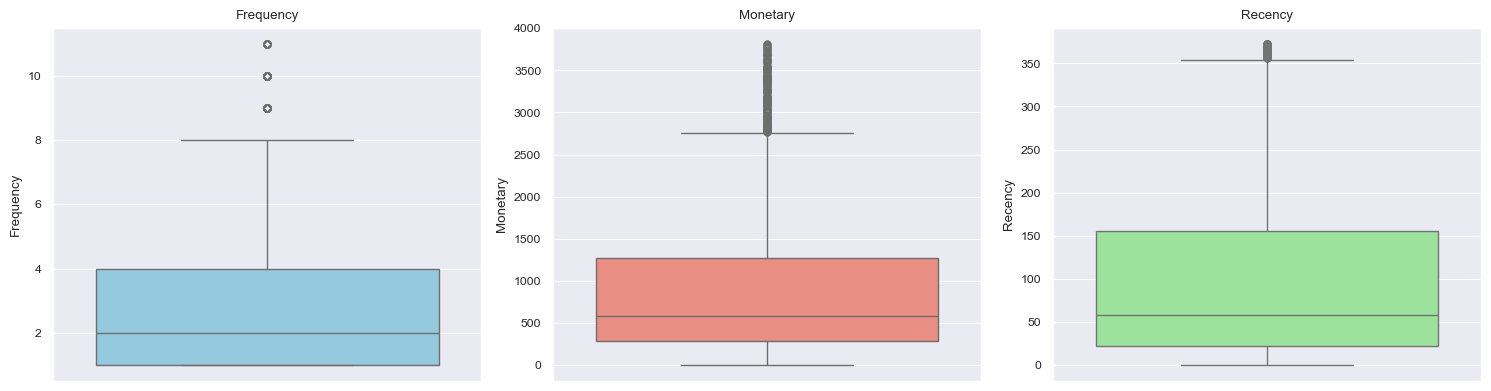

In [134]:
sns.set_theme('paper')
fig,axs = plt.subplots(1,3,figsize=(15,4))
sns.boxplot(y=non_outliers['Frequency'],color='skyblue',ax=axs[0])
axs[0].set_title('Frequency')

sns.boxplot(non_outliers['Monetary'],color='salmon',ax=axs[1])
axs[1].set_title('Monetary')

sns.boxplot(non_outliers['Recency'],color='lightgreen',ax=axs[2])
axs[2].set_title('Recency')
plt.tight_layout()

Text(0.5, 0, 'Recency')

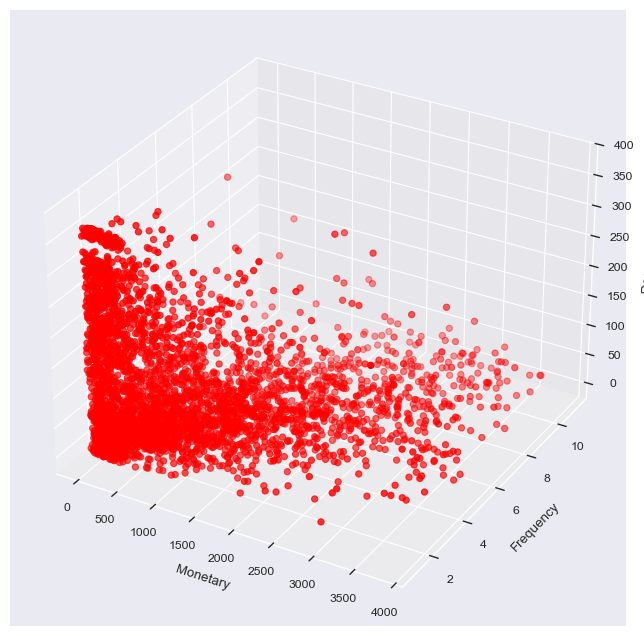

In [ ]:
fig = plt.figure(figsize=(8,8))

ax =fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers['Monetary'],non_outliers['Frequency'],non_outliers['Recency'],color='red')

ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')



In [151]:
import plotly.express as px

# Create a 3D scatter plot with Plotly Express
fig = px.scatter_3d(
    non_outliers, 
    x='Monetary', 
    y='Frequency', 
    z='Recency', 
    color_discrete_sequence=['blue']  # Set color to red
)

# Update axis labels
fig.update_layout(
    scene=dict(
        xaxis_title='Monetary',
        yaxis_title='Frequency',
        zaxis_title='Recency'
    ),
    width=800,  # Equivalent to figsize=(8,8)
    height=800
)

# Show the figure
fig.show()

In [157]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers[['Monetary', 'Frequency', 'Recency']])
scaled_data

array([[-0.62689958,  3.62975807,  0.66943051],
       [ 0.52559219, -0.38566835, -0.9714245 ],
       [-0.80963268, -0.83182684, -0.25228434],
       ...,
       [-0.56125146, -0.83182684,  1.99629474],
       [ 0.4929864 , -0.38566835,  0.13260757],
       [ 1.76530355,  0.50664863, -0.81949348]])

In [164]:
scaled_data = pd.DataFrame(scaled_data,index=non_outliers.index,columns=('Monetary', 'Frequency', 'Recency'))

In [165]:
fig = px.scatter_3d(
    scaled_data, 
    x='Monetary', 
    y='Frequency', 
    z='Recency', 
    color_discrete_sequence=['green']  # Set color to red
)

# Update axis labels
fig.update_layout(
    scene=dict(
        xaxis_title='Monetary',
        yaxis_title='Frequency',
        zaxis_title='Recency'
    ),
    width=800,  # Equivalent to figsize=(8,8)
    height=800
)

# Show the figure
fig.show()

## K_means Clustring

In [226]:
max_k=12
inertia = []
silhouette_scores = []
k_value = range(2, max_k+1)
for k in range(2,max_k+1):
    km = KMeans(n_clusters=k,random_state=42,max_iter=1000)
    Cluster_labels = km.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, Cluster_labels)
    silhouette_scores.append(score)
    inertia.append(km.inertia_)


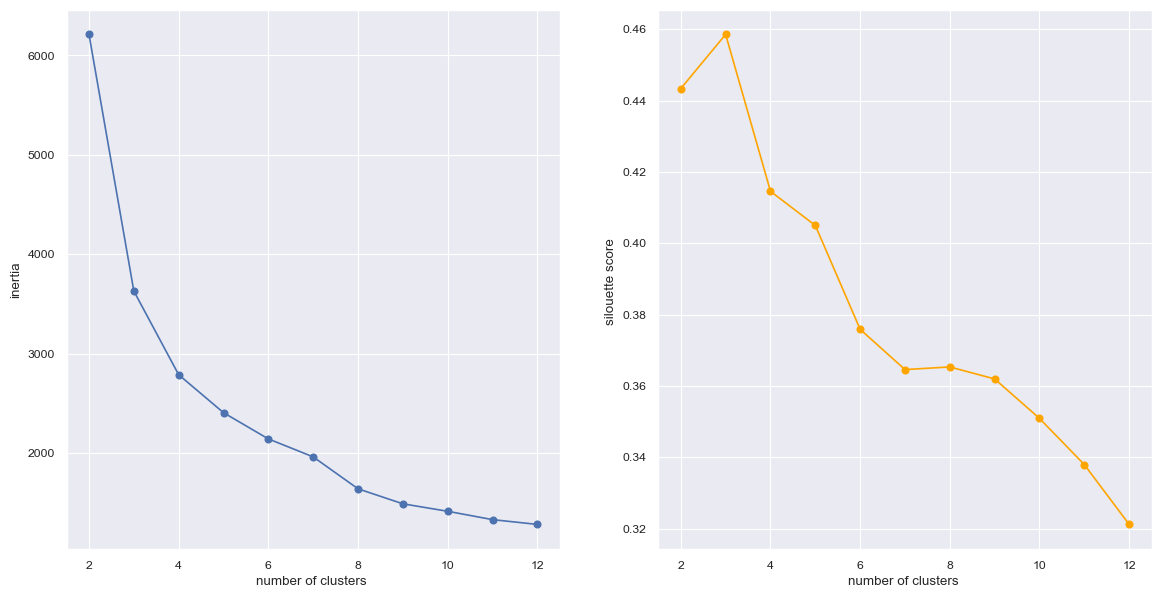

In [232]:
plt.figure(figsize=(14,7))

plt.subplot(1, 2, 1)
plt.plot(k_value,inertia,marker='o')
plt.ylabel("inertia")
plt.xlabel('number of clusters ')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_value,silhouette_scores,marker='o',color='orange')
plt.ylabel("silouette score ")
plt.xlabel('number of clusters ')
plt.grid(True)

In [234]:
kmeans = KMeans(n_clusters=4,max_iter=1000,random_state=42)
Cluster_labels = kmeans.fit_predict(scaled_data)

Cluster_labels



array([3, 2, 1, ..., 0, 2, 2])

In [235]:
non_outliers['Cluster'] = Cluster_labels
non_outliers

C:\Users\ayman\AppData\Local\Temp\ipykernel_17400\3884812653.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Customer ID,Monetary,Frequency,lst_invoice_date,Recency,Cluster
0,12346.000,372.860,11,2010-06-28 13:53:00,164,3
1,12347.000,1323.320,2,2010-12-07 14:57:00,2,2
2,12348.000,222.160,1,2010-09-27 14:59:00,73,1
3,12349.000,2671.140,3,2010-10-28 08:23:00,42,2
4,12351.000,300.930,1,2010-11-29 15:23:00,10,1
...,...,...,...,...,...,...
4307,18283.000,641.770,6,2010-11-22 15:30:00,17,2
4308,18284.000,461.680,1,2010-10-04 11:33:00,66,1
4309,18285.000,427.000,1,2010-02-17 10:24:00,295,0
4310,18286.000,1296.430,2,2010-08-20 11:57:00,111,2


In [244]:
sns.set_palette('pastel')
fig = px.scatter_3d(non_outliers,
                    x='Monetary',
                    y='Frequency',
                    z='Recency',
                    color='Cluster',
                    color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    scene=dict(
        xaxis_title='Monetary',
        yaxis_title='Frequency',
        zaxis_title='Recency'
    ),
    width=800,  # Equivalent to figsize=(8,8)
    height=800)
fig.show()

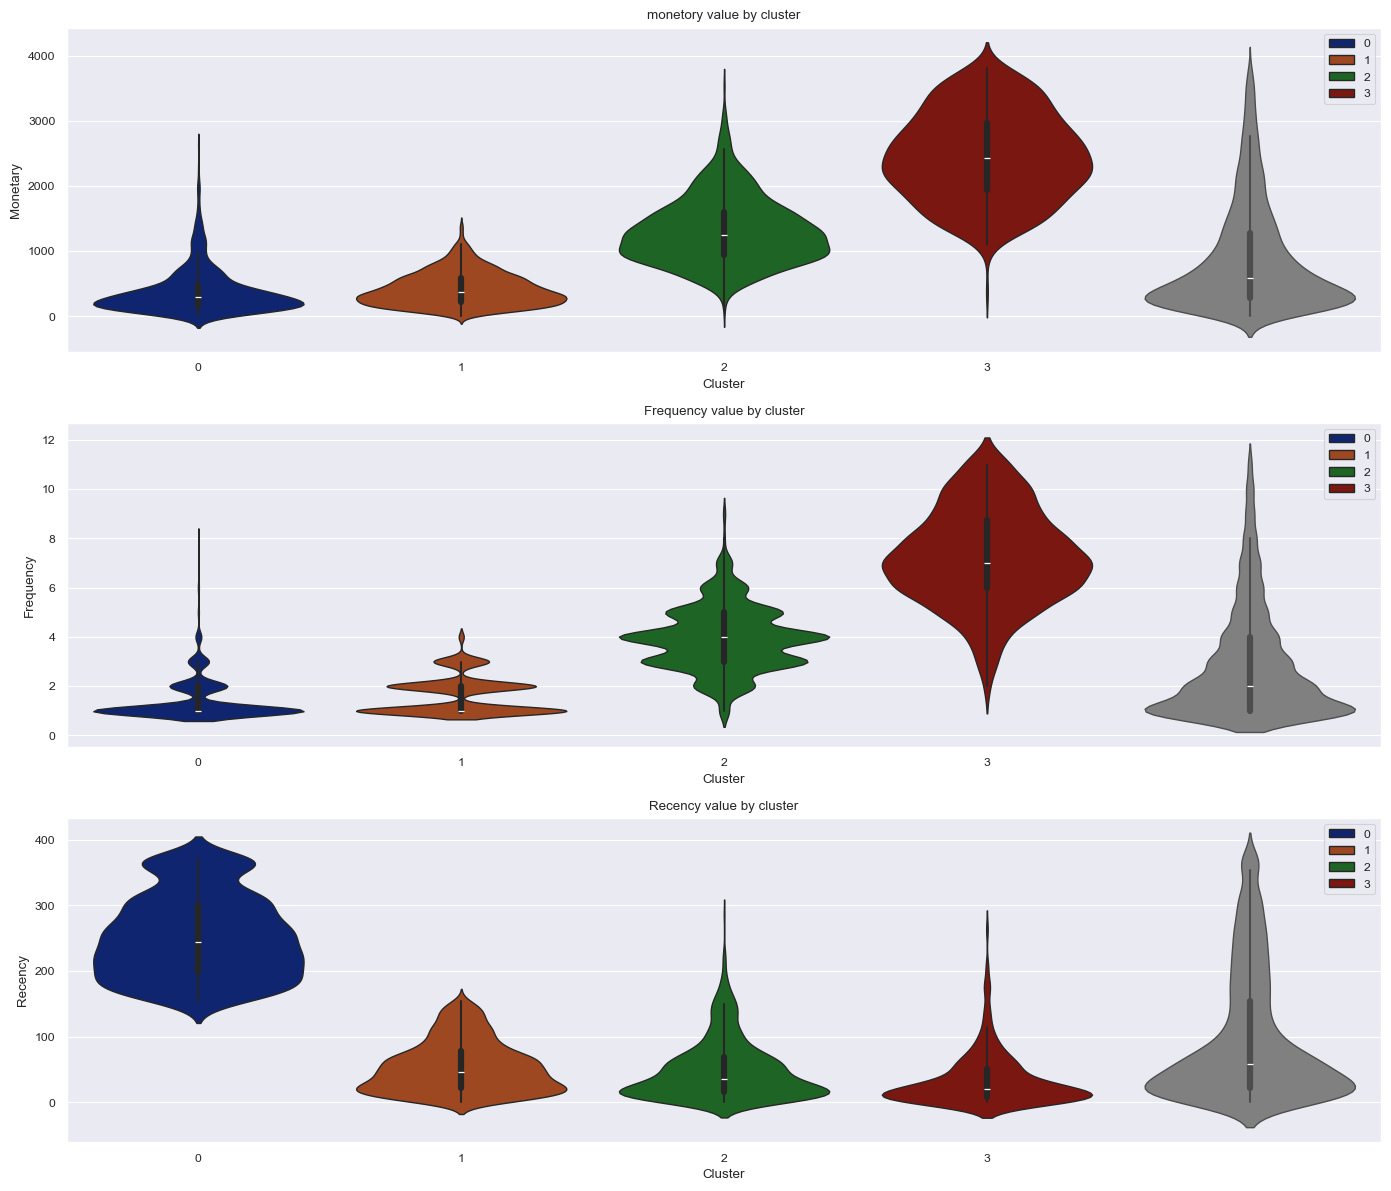

In [248]:

plt.figure(figsize=(14,12))

plt.subplot(3, 1, 1)
sns.violinplot(data=non_outliers,x='Cluster',y='Monetary',palette='dark',hue='Cluster')
sns.violinplot(data=non_outliers,y='Monetary',color='gray',linewidth=1.0)
plt.title('monetory value by cluster')

plt.subplot(3, 1, 2)
sns.violinplot(data=non_outliers,x='Cluster',y='Frequency',palette='dark',hue='Cluster')
sns.violinplot(data=non_outliers,y='Frequency',color='gray',linewidth=1.0)
plt.title('Frequency value by cluster')

plt.subplot(3, 1, 3)
sns.violinplot(data=non_outliers,x='Cluster',y='Recency',palette='dark',hue='Cluster')
sns.violinplot(data=non_outliers,y='Recency',color='gray',linewidth=1.0)
plt.title('Recency value by cluster')

plt.tight_layout()


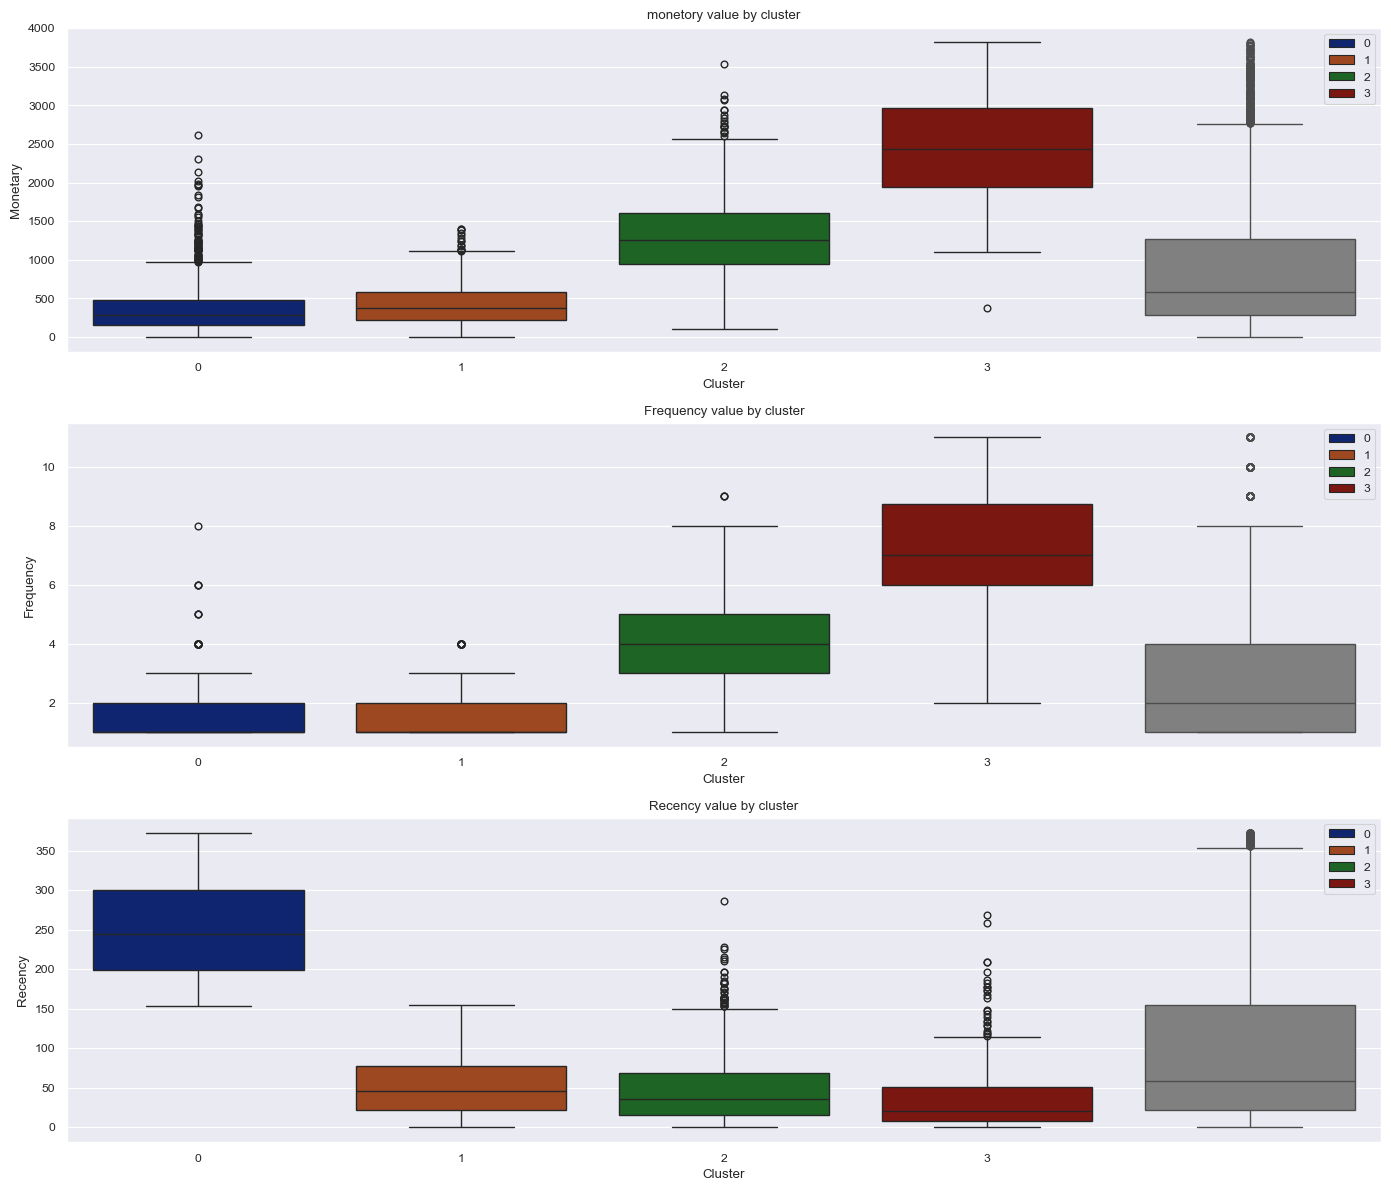

In [251]:
plt.figure(figsize=(14,12))

plt.subplot(3, 1, 1)
sns.boxplot(data=non_outliers,x='Cluster',y='Monetary',palette='dark',hue='Cluster')
sns.boxplot(data=non_outliers,y='Monetary',color='gray',linewidth=1.0)
plt.title('monetory value by cluster')

plt.subplot(3, 1, 2)
sns.boxplot(data=non_outliers,x='Cluster',y='Frequency',palette='dark',hue='Cluster')
sns.boxplot(data=non_outliers,y='Frequency',color='gray',linewidth=1.0)
plt.title('Frequency value by cluster')

plt.subplot(3, 1, 3)
sns.boxplot(data=non_outliers,x='Cluster',y='Recency',palette='dark',hue='Cluster')
sns.boxplot(data=non_outliers,y='Recency',color='gray',linewidth=1.0)
plt.title('Recency value by cluster')

plt.tight_layout()